<a href="https://colab.research.google.com/github/JLaura011/Business-Analytics/blob/master/RFMSuperStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from datetime import datetime

In [10]:
!pip install squarify
import squarify
import json

In [8]:
!pip install geopandas

     |████████████████████████████████| 972kB 3.4MB/s 
     |████████████████████████████████| 10.9MB 13.3MB/s 
     |████████████████████████████████| 14.8MB 311kB/s 


In [9]:
import geopandas as gpd
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
from bokeh.models import HoverTool

ANALISIS RFM

In [18]:
url="https://raw.githubusercontent.com/JLaura011/Business-Analytics/master/Superstore.csv"

In [19]:
df = pd.read_csv(url)

In [20]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08T00:00:00Z,2016-11-11T00:00:00Z,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08T00:00:00Z,2016-11-11T00:00:00Z,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12T00:00:00Z,2016-06-16T00:00:00Z,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11T00:00:00Z,2015-10-18T00:00:00Z,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11T00:00:00Z,2015-10-18T00:00:00Z,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [23]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [24]:
df['Order Date'].max()

'2017-12-30T00:00:00Z'

In [25]:
df['Order Date'].min()

'2014-01-03T00:00:00Z'

In [26]:
df['Año']=df['Quantity']*df['Profit']

In [27]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Año
0,1,CA-2016-152156,2016-11-08T00:00:00Z,2016-11-11T00:00:00Z,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,83.8272
1,2,CA-2016-152156,2016-11-08T00:00:00Z,2016-11-11T00:00:00Z,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,658.7460
2,3,CA-2016-138688,2016-06-12T00:00:00Z,2016-06-16T00:00:00Z,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,13.7428
3,4,US-2015-108966,2015-10-11T00:00:00Z,2015-10-18T00:00:00Z,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-1915.1550
4,5,US-2015-108966,2015-10-11T00:00:00Z,2015-10-18T00:00:00Z,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,5.0328


In [32]:
df['Año'].drop

<bound method Series.drop of 0         83.8272
1        658.7460
2         13.7428
3      -1915.1550
4          5.0328
          ...    
9989      12.3084
9990      31.2664
9991      38.7864
9992      53.2800
9993     145.8960
Name: Año, Length: 9994, dtype: float64>

In [35]:
df.drop(['Año'],axis=1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08T00:00:00Z,2016-11-11T00:00:00Z,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08T00:00:00Z,2016-11-11T00:00:00Z,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12T00:00:00Z,2016-06-16T00:00:00Z,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11T00:00:00Z,2015-10-18T00:00:00Z,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11T00:00:00Z,2015-10-18T00:00:00Z,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21T00:00:00Z,2014-01-23T00:00:00Z,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26T00:00:00Z,2017-03-03T00:00:00Z,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26T00:00:00Z,2017-03-03T00:00:00Z,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26T00:00:00Z,2017-03-03T00:00:00Z,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [36]:
import time
import datetime
from datetime import date

In [39]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [42]:
df['Año']=df['Order Date'].dt.year

In [43]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Año
0,1,CA-2016-152156,2016-11-08 00:00:00+00:00,2016-11-11T00:00:00Z,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016
1,2,CA-2016-152156,2016-11-08 00:00:00+00:00,2016-11-11T00:00:00Z,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016
2,3,CA-2016-138688,2016-06-12 00:00:00+00:00,2016-06-16T00:00:00Z,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016
3,4,US-2015-108966,2015-10-11 00:00:00+00:00,2015-10-18T00:00:00Z,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
4,5,US-2015-108966,2015-10-11 00:00:00+00:00,2015-10-18T00:00:00Z,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015


In [48]:
df['Año'].groupby(df['Segment']).agg('count')

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: Año, dtype: int64

In [50]:
pd.crosstab(index=df['Segment'],columns=df['Año'],margins=True)

Año,2014,2015,2016,2017,All
Segment,,,,,
Consumer,1070,1125,1328,1668,5191
Corporate,611,636,793,980,3020
Home Office,312,341,466,664,1783
All,1993,2102,2587,3312,9994


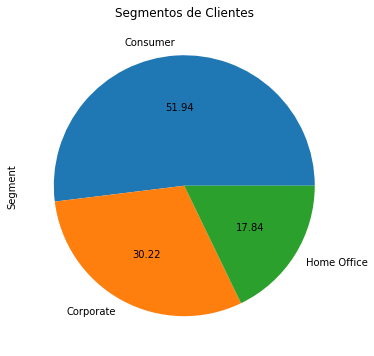

In [52]:
plot = df['Segment'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Segmentos de Clientes')

In [53]:
pd.crosstab(index=df['Category'],columns=df['Año'],margins=True)

Año,2014,2015,2016,2017,All
Category,,,,,
Furniture,421,452,562,686,2121
Office Supplies,1217,1241,1566,2002,6026
Technology,355,409,459,624,1847
All,1993,2102,2587,3312,9994


In [55]:
pd.crosstab(df['Segment'],df['Category'])

Category,Furniture,Office Supplies,Technology
Segment,,,
Consumer,1113,3127,951
Corporate,646,1820,554
Home Office,362,1079,342


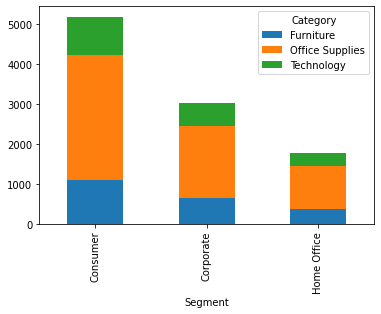

In [54]:
pd.crosstab(df['Segment'],df['Category']).plot(kind="bar",stacked=True)

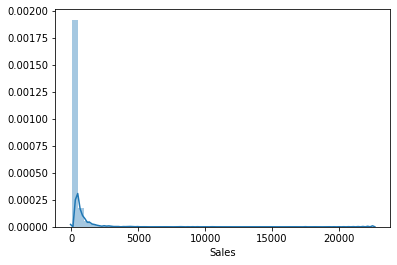

In [56]:
sns.distplot(df["Sales"])

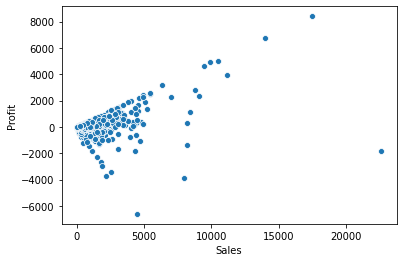

In [57]:
sns.scatterplot("Sales",'Profit',data=df)

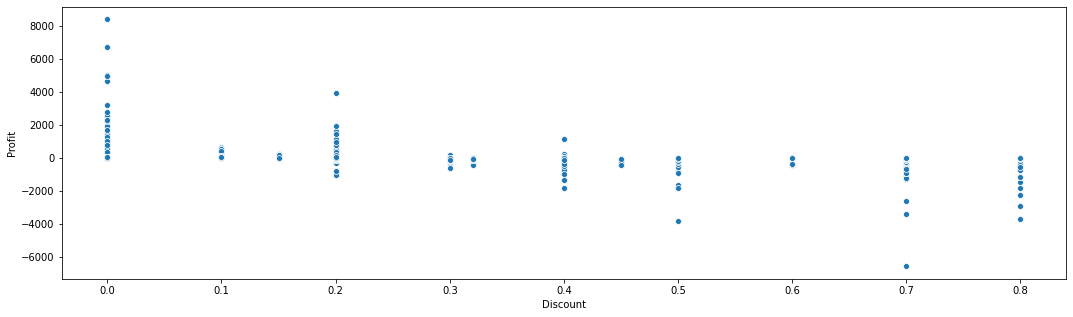

In [58]:
axes,fig=plt.subplots(0,1,figsize=(18,5))
sns.scatterplot("Discount",'Profit',data=df)

Aquí se puede observar que cuando el descuento es de hasta 0.3, hay una ganancia.
Pero si el descuento aumenta más allá de 0,3, se produce una pérdida.

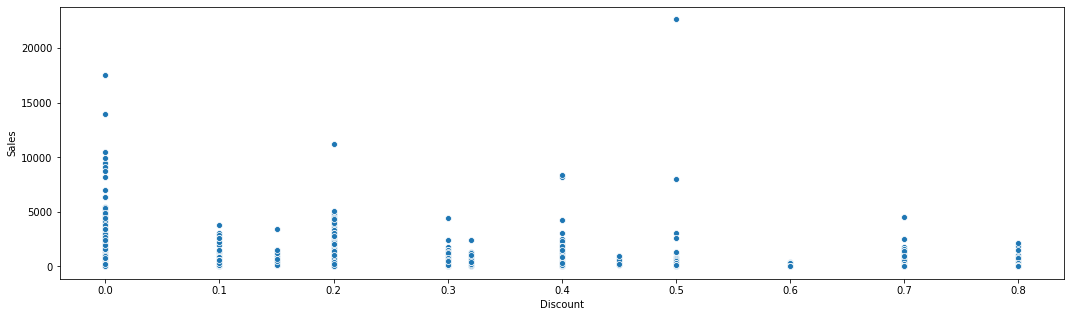

In [59]:
axes,fig=plt.subplots(0,1,figsize=(18,5))
sns.scatterplot('Discount','Sales',data=df)

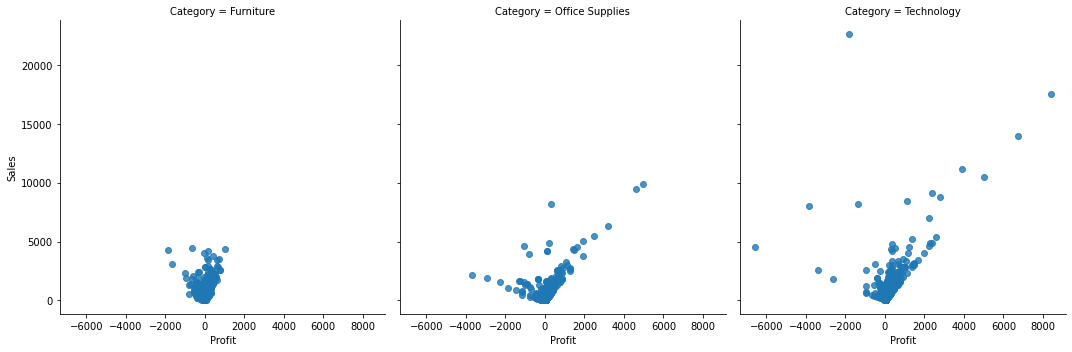

In [60]:
sns.lmplot(x="Profit",y="Sales",data=df,fit_reg=False,col="Category")
plt.show()


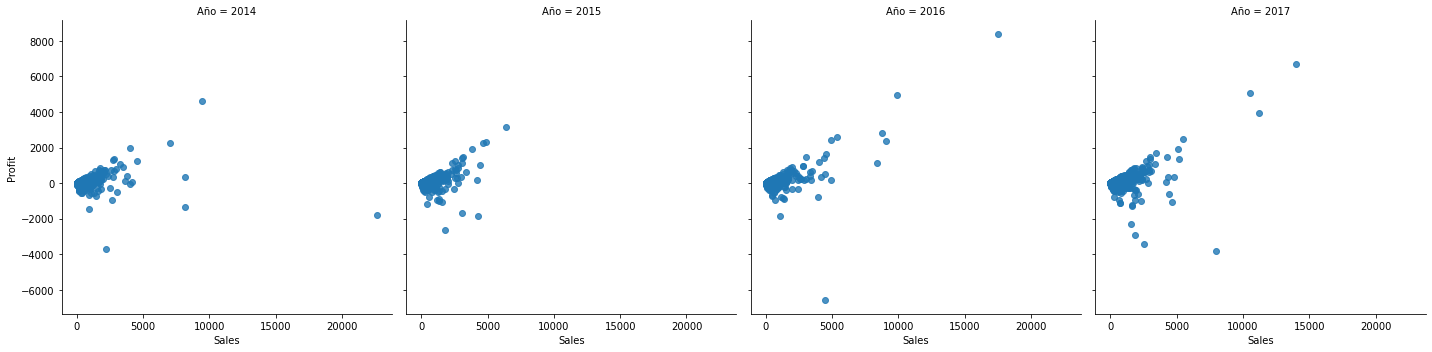

In [62]:
sns.lmplot(x="Sales",y="Profit",data=df,fit_reg=False,col="Año")

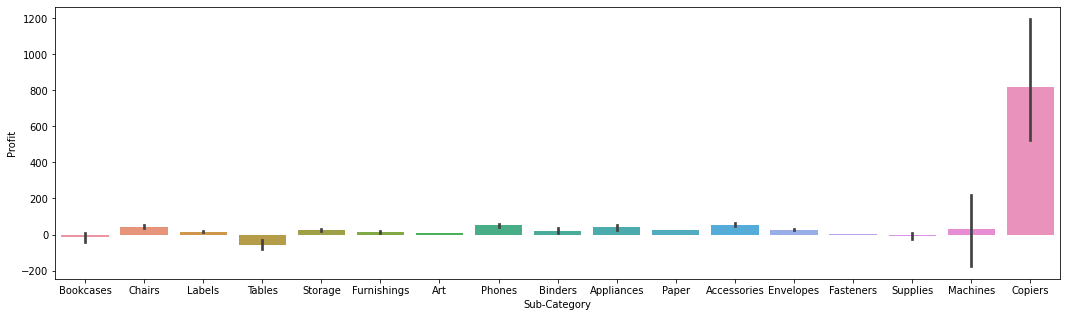

In [63]:
axes,fig=plt.subplots(0,1,figsize=(18,5))
sns.barplot("Sub-Category","Profit",data=df)

In [64]:
df['Order Date'].max()

Timestamp('2017-12-30 00:00:00+0000', tz='UTC')

In [66]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df = df.drop(['row_id', 'ship_date', 'customer_name', 'postal_code'], axis=1)

In [78]:
print(today)

2017-12-30 00:00:00


In [80]:
print(df['order_date'])

0      2016-11-08 00:00:00+00:00
1      2016-11-08 00:00:00+00:00
2      2016-06-12 00:00:00+00:00
3      2015-10-11 00:00:00+00:00
4      2015-10-11 00:00:00+00:00
                  ...           
9989   2014-01-21 00:00:00+00:00
9990   2017-02-26 00:00:00+00:00
9991   2017-02-26 00:00:00+00:00
9992   2017-02-26 00:00:00+00:00
9993   2017-05-04 00:00:00+00:00
Name: order_date, Length: 9994, dtype: datetime64[ns, UTC]


In [85]:
from datetime import datetime
today = datetime.strptime('2017-12-30', '%Y-%m-%d')

In [86]:
print(today)

2017-12-30 00:00:00


In [83]:
df['order_date']= pd.to_datetime(df.order_date).dt.tz_localize(None)

In [84]:
print(df['order_date'])

0      2016-11-08
1      2016-11-08
2      2016-06-12
3      2015-10-11
4      2015-10-11
          ...    
9989   2014-01-21
9990   2017-02-26
9991   2017-02-26
9992   2017-02-26
9993   2017-05-04
Name: order_date, Length: 9994, dtype: datetime64[ns]


In [87]:
agg_dict1 = {
    'order_id': 'count',
    'order_date': 'max',
    'sales': 'sum'
}
df_rfm = df.groupby('customer_id').agg(agg_dict1).reset_index()
df_rfm.columns = ['customer_id', 'frequency', 'max_date', 'monetary']
df_rfm['recency'] = (today - df_rfm['max_date']).dt.days
df_rfm.drop(['max_date'], axis=1, inplace=True)

In [88]:
r_labels, f_labels, m_labels = range(5, 0, -1), range(1,6), range(1,6)

df_rfm['r_score'] = pd.qcut(df_rfm['recency'], q=5, labels=r_labels).astype(int)
df_rfm['f_score'] = pd.qcut(df_rfm['frequency'], q=5, labels=f_labels).astype(int)
df_rfm['m_score'] = pd.qcut(df_rfm['monetary'], q=5, labels=m_labels).astype(int)

df_rfm['rfm_sum'] = df_rfm['r_score'] + df_rfm['f_score'] + df_rfm['m_score']

In [89]:

def assign_label(df, r_rule, fm_rule, label, colname='rfm_label'):
    df.loc[(df['r_score'].between(r_rule[0], r_rule[1]))
            & (df['f_score'].between(fm_rule[0], fm_rule[1])), colname] = label
    return df

In [90]:
df_rfm['rfm_label'] = ''

df_rfm = assign_label(df_rfm, (5,5), (4,5), 'champions')
df_rfm = assign_label(df_rfm, (3,4), (4,5), 'loyal customers')
df_rfm = assign_label(df_rfm, (4,5), (2,3), 'potential loyalist')
df_rfm = assign_label(df_rfm, (5,5), (1,1), 'new customers')
df_rfm = assign_label(df_rfm, (4,4), (1,1), 'promising')
df_rfm = assign_label(df_rfm, (3,3), (3,3), 'needing attention')
df_rfm = assign_label(df_rfm, (3,3), (1,2), 'about to sleep')
df_rfm = assign_label(df_rfm, (1,2), (3,4), 'at risk')
df_rfm = assign_label(df_rfm, (1,2), (5,5), 'cant loose them')
df_rfm = assign_label(df_rfm, (1,2), (1,2), 'hibernating')

In [101]:
df_rfm.head()

,customer_id,frequency,monetary,recency,r_score,f_score,m_score,rfm_sum,rfm_label
0,AA-10315,11,5563.560,184,2,3,5,10,at risk
1,AA-10375,15,1056.390,19,5,4,2,11,champions
2,AA-10480,12,1790.512,259,1,3,3,7,at risk
3,AA-10645,18,5086.935,55,3,4,5,12,loyal customers
4,AB-10015,6,886.156,415,1,1,1,3,hibernating


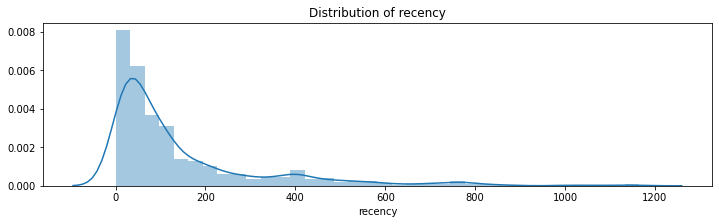

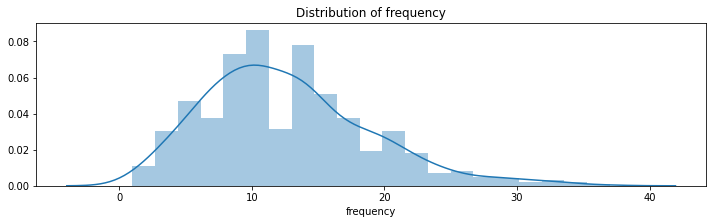

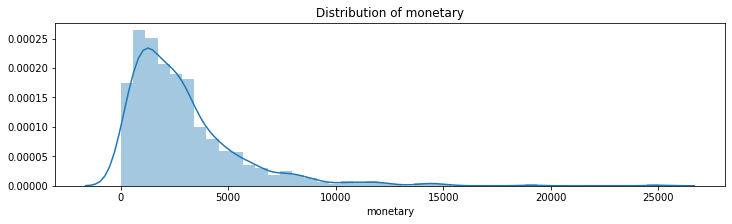

In [91]:
colnames = ['recency', 'frequency', 'monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(df_rfm[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

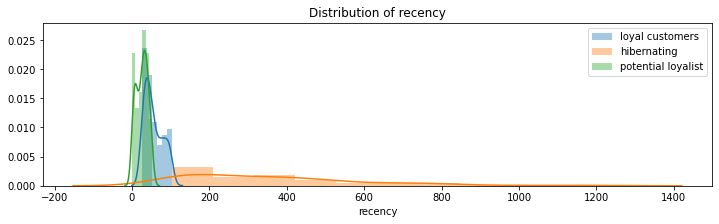

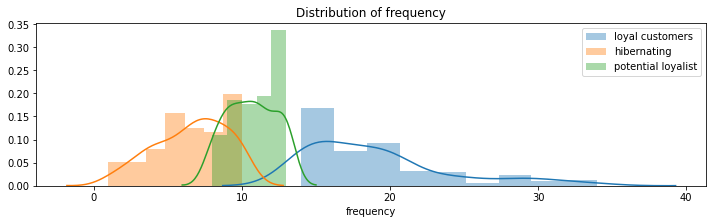

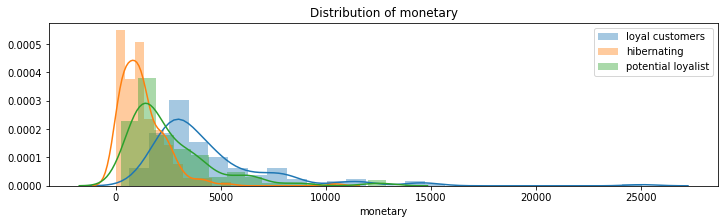

In [92]:
segments = ['loyal customers', 'hibernating', 'potential loyalist']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    for segment in segments:
        sns.distplot(df_rfm[df_rfm['rfm_label']==segment][col], label=segment)
    ax.set_title('Distribution of %s' % col)
    plt.legend()
    plt.show()

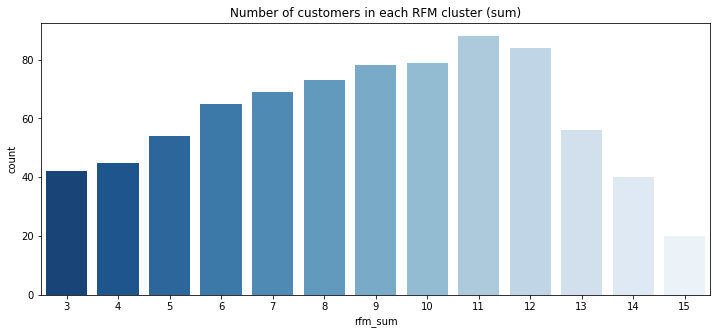

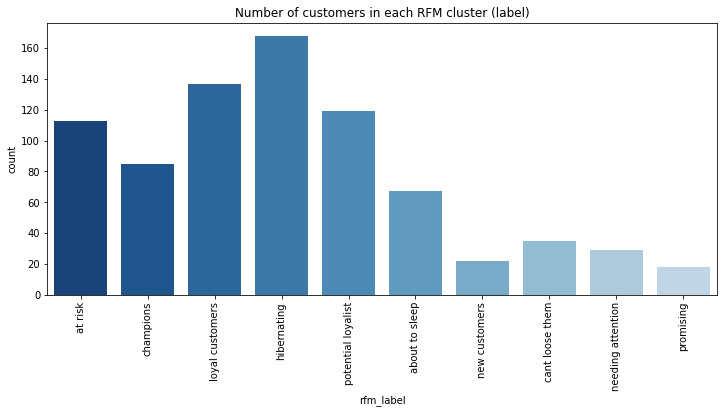

In [93]:

palette = sns.color_palette("Blues_r", n_colors=13)

for rfm_type in ['sum', 'label']:
    fig, ax = plt.subplots(figsize=(12,5))
    sns.countplot(x='rfm_'+rfm_type, data=df_rfm, palette=palette)
    ax.set_title('Number of customers in each RFM cluster (%s)' % rfm_type)
    if rfm_type == 'label':
        plt.xticks(rotation=90)
    plt.show()

In [94]:
agg_dict2 = {
    'customer_id': 'count',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'sum'
}

df_analysis = df_rfm.groupby('rfm_label').agg(agg_dict2).sort_values(by='recency').reset_index()
df_analysis.rename({'rfm_label': 'label', 'customer_id': 'count'}, axis=1, inplace=True)
df_analysis['count_share'] = df_analysis['count'] / df_analysis['count'].sum()
df_analysis['monetary_share'] = df_analysis['monetary'] / df_analysis['monetary'].sum()
df_analysis['monetary'] = df_analysis['monetary'] / df_analysis['count']

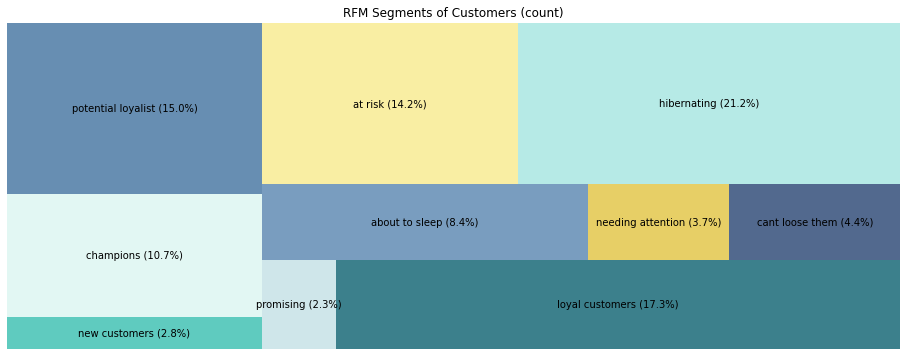

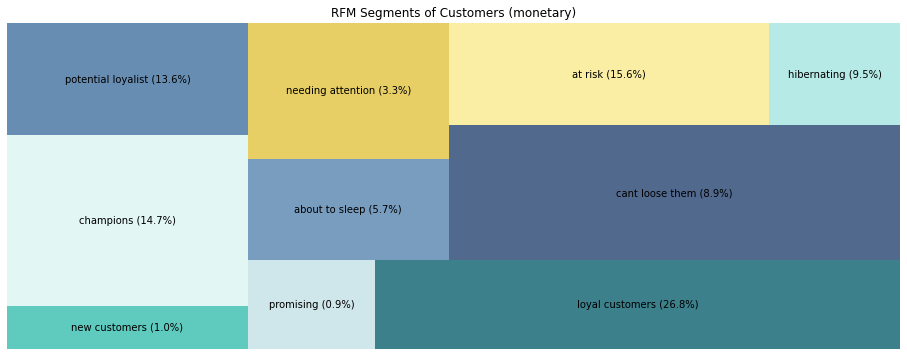

In [95]:

colors = ['#37BEB0', '#DBF5F0', '#41729F', '#C3E0E5', '#0C6170', '#5885AF', '#E1C340', '#274472', '#F8EA8C', '#A4E5E0', '#1848A0']

for col in ['count', 'monetary']:
    labels = df_analysis['label'] + df_analysis[col + '_share'].apply(lambda x: ' ({0:.1f}%)'.format(x*100))

    fig, ax = plt.subplots(figsize=(16,6))
    squarify.plot(sizes=df_analysis[col], label=labels, alpha=.8, color=colors)
    ax.set_title('RFM Segments of Customers (%s)' % col)
    plt.axis('off')
    plt.show()

In [117]:
result=df['customer_id'].nunique()
print(result)

793


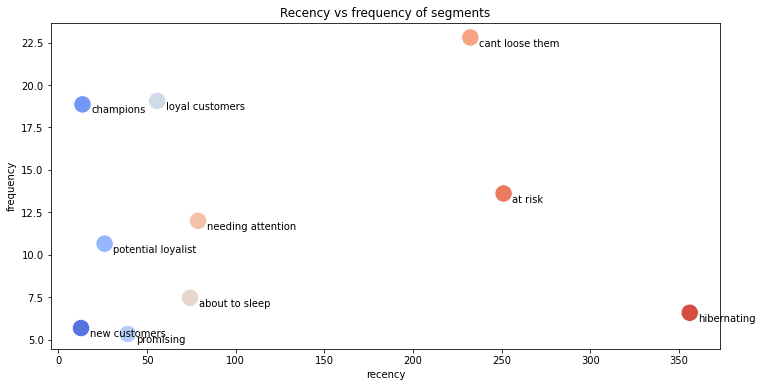

In [96]:
palette = sns.color_palette("coolwarm", 10)

fig, ax = plt.subplots(figsize=(12,6))
plot = sns.scatterplot(x='recency', y='frequency', data=df_analysis, hue='label', s=300, palette=palette)

for i in range(len(df_analysis)):
     plot.text(df_analysis['recency'][i]+5,
               df_analysis['frequency'][i]-0.5,
               df_analysis['label'][i],
               horizontalalignment='left',
               size='medium', color='black')

ax.set_title('Recency vs frequency of segments')
ax.get_legend().remove()
plt.show()

In [126]:
agg_dict4 = {
    'product_id': 'count',
    'quantity': 'sum',
    'sales': 'sum',
    'discount': 'sum',
    'profit': 'sum',
    'rfm_sum': 'first',
    'rfm_label': 'first'
}


In [125]:
df = df.merge(df_rfm[['customer_id', 'rfm_sum', 'rfm_label']], on='customer_id', how='left')

In [127]:
df_order = df.groupby('order_id').agg(agg_dict4).reset_index()
df_order_segment = df_order.groupby('rfm_label')[['quantity', 'sales', 'discount', 'profit', 'rfm_sum']].mean().reset_index()

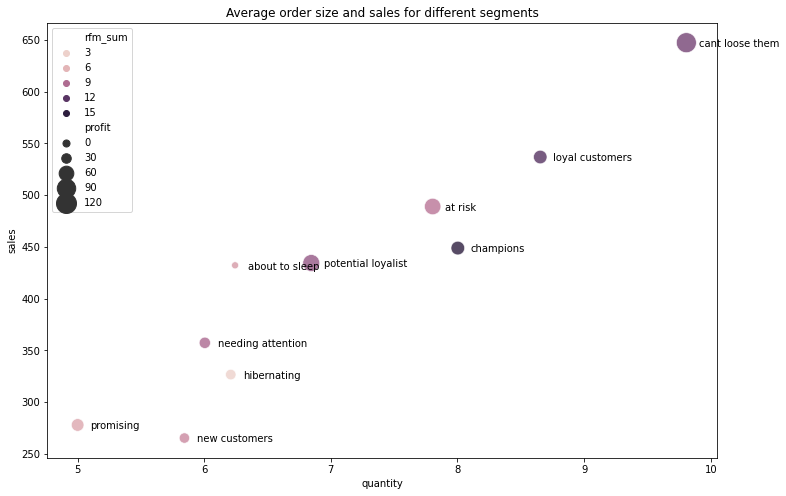

In [128]:
fig, ax = plt.subplots(figsize=(12,8))
plot = sns.scatterplot(x='quantity', y='sales', data=df_order_segment, size='profit', sizes=(50,400), hue='rfm_sum', alpha=.8)

for i in range(len(df_order_segment)):
     plot.text(df_order_segment['quantity'][i]+0.1,
               df_order_segment['sales'][i]-4,
               df_order_segment['rfm_label'][i],
               horizontalalignment='left',
               size='medium', color='black')

ax.set_title('Average order size and sales for different segments')
plt.show()

In [129]:
df_order_segment.to_excel (r'C:\Users\USUARIO\Desktop\Bancom\final.xlsx', index = False, header=True)

In [130]:
df.head()

,order_id,order_date,ship_mode,customer_id,segment,country,city,state,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,año,rfm_sum,rfm_label
0,CA-2016-152156,2016-11-08,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,4,hibernating
1,CA-2016-152156,2016-11-08,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,4,hibernating
2,CA-2016-138688,2016-06-12,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,9,potential loyalist
3,US-2015-108966,2015-10-11,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,11,loyal customers
4,US-2015-108966,2015-10-11,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,11,loyal customers
